Saving mitdiec.csv to mitdiec (1).csv
Multi-class classification detected. Sensitivity and specificity calculation is not straightforward.
SVC Accuracy: 0.9469 (10-Fold)
SVC Sensitivity: 0.9444
SVC Specificity: 0.9677
Multi-class classification detected. Sensitivity and specificity calculation is not straightforward.
Random Forest Accuracy: 0.9406 (10-Fold)
Random Forest Sensitivity: 1.0000
Random Forest Specificity: 0.9355
Multi-class classification detected. Sensitivity and specificity calculation is not straightforward.
KNN Accuracy: 0.8906 (10-Fold)
KNN Sensitivity: 0.8333
KNN Specificity: 0.9355
Multi-class classification detected. Sensitivity and specificity calculation is not straightforward.
Logistic Regression Accuracy: 0.9563 (10-Fold)
Logistic Regression Sensitivity: 0.9444
Logistic Regression Specificity: 0.9355
Multi-class classification detected. Sensitivity and specificity calculation is not straightforward.
Decision Tree Accuracy: 0.9125 (10-Fold)
Decision Tree Sensitiv

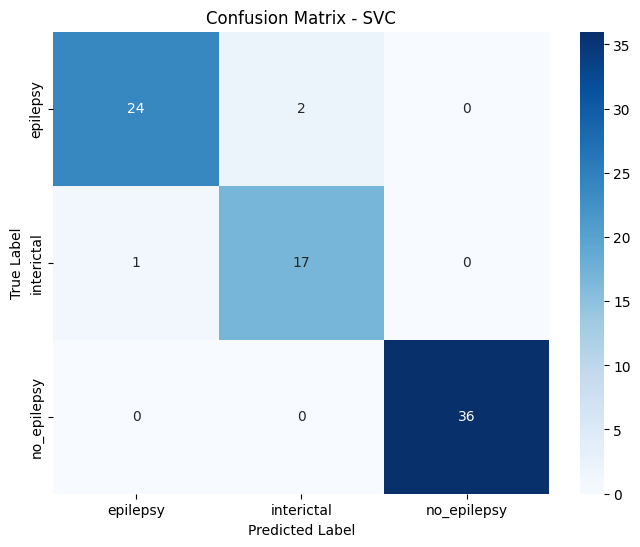

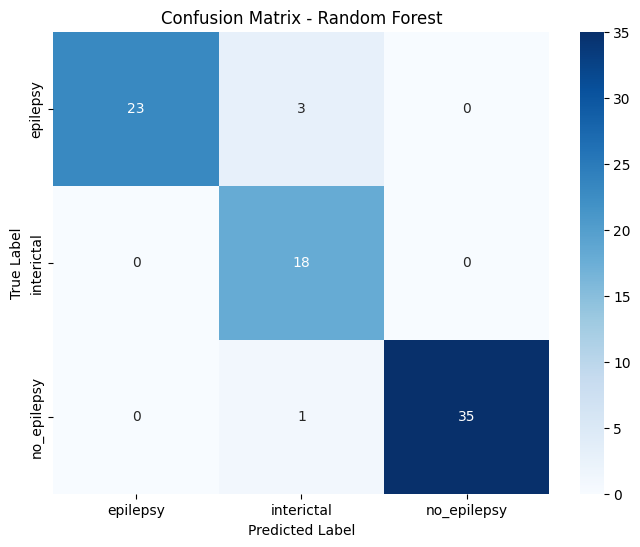

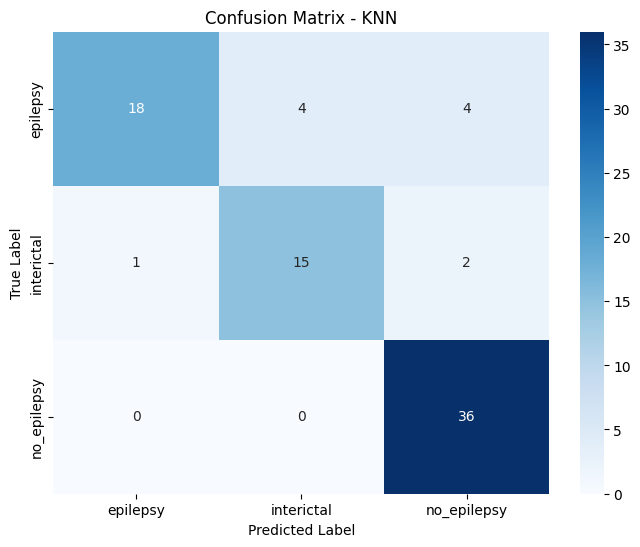

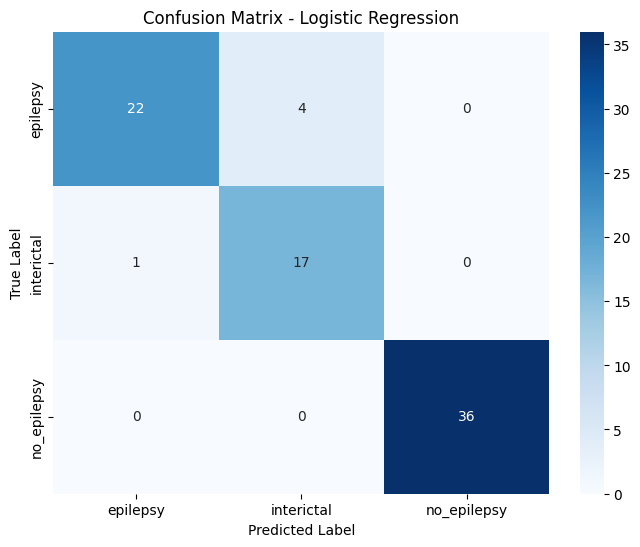

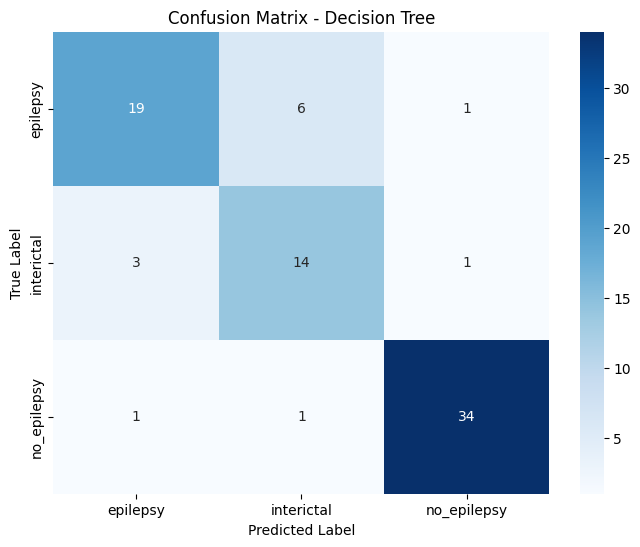

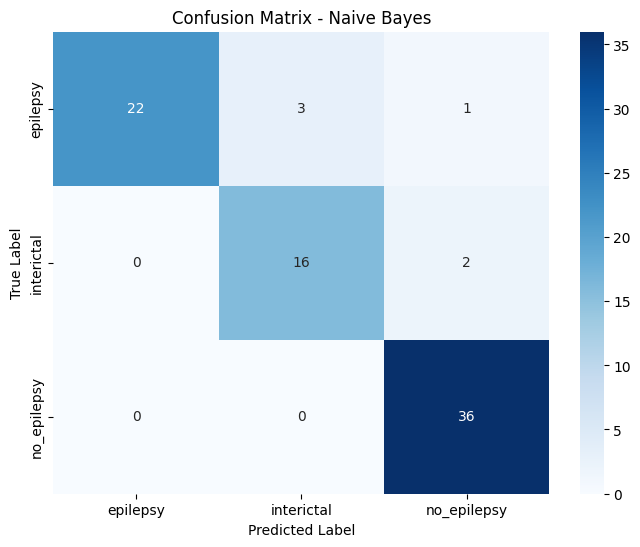

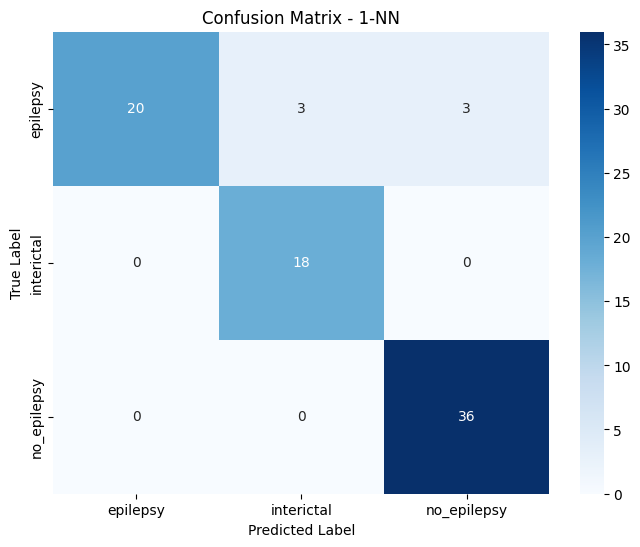

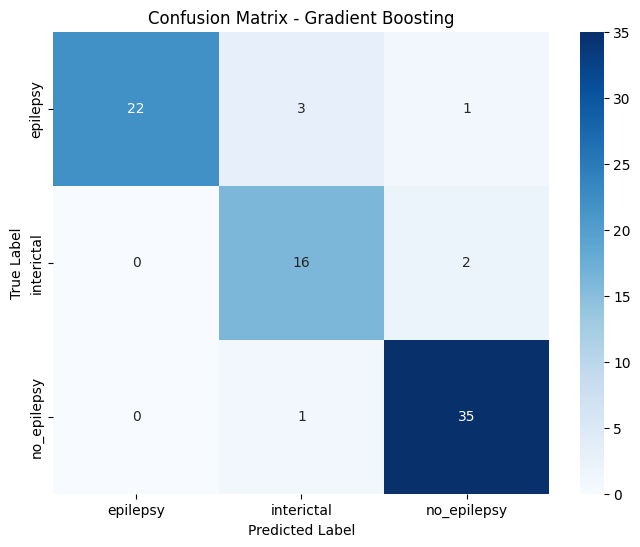

In [21]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from google.colab import files
import io

uploaded = files.upload()

file_name = next(iter(uploaded))

df = pd.read_csv(io.BytesIO(uploaded[file_name]))

# Assuming 'df' is your DataFrame
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize KFold with 10 folds
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Function to calculate sensitivity and specificity
# def calculate_sensitivity_specificity(y_true, y_pred):
#     tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
#     sensitivity = tp / (tp + fn)
#     specificity = tn / (tn + fp)
#     return sensitivity, specificity

def calculate_sensitivity_specificity(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)

    # Check if binary classification
    if cm.shape == (2, 2):
        tn, fp, fn, tp = cm.ravel()
        sensitivity = tp / (tp + fn)
        specificity = tn / (tn + fp)
        return sensitivity, specificity
    else:
        # Handle multi-class case (e.g., calculate metrics per class)
        # Or raise an exception if not expected
        print("Multi-class classification detected. Sensitivity and specificity calculation is not straightforward.")
        # Example: Per-class sensitivity and specificity
        # Assuming that class '1' is the positive class
        FP = cm.sum(axis=0) - np.diag(cm)
        FN = cm.sum(axis=1) - np.diag(cm)
        TP = np.diag(cm)
        TN = cm.sum() - (FP + FN + TP)

        sensitivity = TP[1] / (TP[1] + FN[1])
        specificity = TN[1] / (TN[1] + FP[1])
        return sensitivity, specificity

# Initialize lists to store the results
accuracy_scores = []
sensitivity_scores = []
specificity_scores = []

# 1. SVC
model_svc = SVC(kernel='linear', random_state=42)
scores_svc = cross_val_score(model_svc, X_train, y_train, cv=kfold, scoring='accuracy')
accuracy_scores.append(np.mean(scores_svc))
model_svc.fit(X_train, y_train)
y_pred_svc = model_svc.predict(X_test)
sensitivity_svc, specificity_svc = calculate_sensitivity_specificity(y_test, y_pred_svc)
sensitivity_scores.append(sensitivity_svc)
specificity_scores.append(specificity_svc)
print(f"SVC Accuracy: {np.mean(scores_svc):.4f} (10-Fold)")
print(f"SVC Sensitivity: {sensitivity_svc:.4f}")
print(f"SVC Specificity: {specificity_svc:.4f}")

# 2. Random Forest
model_rf = RandomForestClassifier(random_state=42)
scores_rf = cross_val_score(model_rf, X_train, y_train, cv=kfold, scoring='accuracy')
accuracy_scores.append(np.mean(scores_rf))
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
sensitivity_rf, specificity_rf = calculate_sensitivity_specificity(y_test, y_pred_rf)
sensitivity_scores.append(sensitivity_rf)
specificity_scores.append(specificity_rf)
print(f"Random Forest Accuracy: {np.mean(scores_rf):.4f} (10-Fold)")
print(f"Random Forest Sensitivity: {sensitivity_rf:.4f}")
print(f"Random Forest Specificity: {specificity_rf:.4f}")

# 3. KNN
knn = KNeighborsClassifier(n_neighbors=7)
scores_knn = cross_val_score(knn, X_train, y_train, cv=kfold, scoring='accuracy')
accuracy_scores.append(np.mean(scores_knn))
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
sensitivity_knn, specificity_knn = calculate_sensitivity_specificity(y_test, y_pred_knn)
sensitivity_scores.append(sensitivity_knn)
specificity_scores.append(specificity_knn)
print(f"KNN Accuracy: {np.mean(scores_knn):.4f} (10-Fold)")
print(f"KNN Sensitivity: {sensitivity_knn:.4f}")
print(f"KNN Specificity: {specificity_knn:.4f}")

# 4. Logistic Regression
model_lr = LogisticRegression()
scores_lr = cross_val_score(model_lr, X_train, y_train, cv=kfold, scoring='accuracy')
accuracy_scores.append(np.mean(scores_lr))
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)
sensitivity_lr, specificity_lr = calculate_sensitivity_specificity(y_test, y_pred_lr)
sensitivity_scores.append(sensitivity_lr)
specificity_scores.append(specificity_lr)
print(f"Logistic Regression Accuracy: {np.mean(scores_lr):.4f} (10-Fold)")
print(f"Logistic Regression Sensitivity: {sensitivity_lr:.4f}")
print(f"Logistic Regression Specificity: {specificity_lr:.4f}")

# 5. Decision Tree
model_dt = DecisionTreeClassifier(random_state=42)
scores_dt = cross_val_score(model_dt, X_train, y_train, cv=kfold, scoring='accuracy')
accuracy_scores.append(np.mean(scores_dt))
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)
sensitivity_dt, specificity_dt = calculate_sensitivity_specificity(y_test, y_pred_dt)
sensitivity_scores.append(sensitivity_dt)
specificity_scores.append(specificity_dt)
print(f"Decision Tree Accuracy: {np.mean(scores_dt):.4f} (10-Fold)")
print(f"Decision Tree Sensitivity: {sensitivity_dt:.4f}")
print(f"Decision Tree Specificity: {specificity_dt:.4f}")

# 6. Naive Bayes
model_nb = GaussianNB()
scores_nb = cross_val_score(model_nb, X_train, y_train, cv=kfold, scoring='accuracy')
accuracy_scores.append(np.mean(scores_nb))
model_nb.fit(X_train, y_train)
y_pred_nb = model_nb.predict(X_test)
sensitivity_nb, specificity_nb = calculate_sensitivity_specificity(y_test, y_pred_nb)
sensitivity_scores.append(sensitivity_nb)
specificity_scores.append(specificity_nb)
print(f"Naive Bayes Accuracy: {np.mean(scores_nb):.4f} (10-Fold)")
print(f"Naive Bayes Sensitivity: {sensitivity_nb:.4f}")
print(f"Naive Bayes Specificity: {specificity_nb:.4f}")

# 7. 1-NN
knn_1nn = KNeighborsClassifier(n_neighbors=1)
scores_1nn = cross_val_score(knn_1nn, X_train, y_train, cv=kfold, scoring='accuracy')
accuracy_scores.append(np.mean(scores_1nn))
knn_1nn.fit(X_train, y_train)
y_pred_1nn = knn_1nn.predict(X_test)
sensitivity_1nn, specificity_1nn = calculate_sensitivity_specificity(y_test, y_pred_1nn)
sensitivity_scores.append(sensitivity_1nn)
specificity_scores.append(specificity_1nn)
print(f"1-NN Accuracy: {np.mean(scores_1nn):.4f} (10-Fold)")
print(f"1-NN Sensitivity: {sensitivity_1nn:.4f}")
print(f"1-NN Specificity: {specificity_1nn:.4f}")

# 8. Gradient Boosting
model_gb = GradientBoostingClassifier(random_state=42)
scores_gb = cross_val_score(model_gb, X_train, y_train, cv=kfold, scoring='accuracy')
accuracy_scores.append(np.mean(scores_gb))
model_gb.fit(X_train, y_train)
y_pred_gb = model_gb.predict(X_test)
sensitivity_gb, specificity_gb = calculate_sensitivity_specificity(y_test, y_pred_gb)
sensitivity_scores.append(sensitivity_gb)
specificity_scores.append(specificity_gb)
print(f"Gradient Boosting Accuracy: {np.mean(scores_gb):.4f} (10-Fold)")
print(f"Gradient Boosting Sensitivity: {sensitivity_gb:.4f}")
print(f"Gradient Boosting Specificity: {specificity_gb:.4f}")

# Calculate and print the average scores
avg_accuracy = np.mean(accuracy_scores)
avg_sensitivity = np.mean(sensitivity_scores)
avg_specificity = np.mean(specificity_scores)

print(f"\nAverage Accuracy: {avg_accuracy:.4f}")
print(f"Average Sensitivity: {avg_sensitivity:.4f}")
print(f"Average Specificity: {avg_specificity:.4f}")


# Create and display confusion matrices (optional)
models = {
    'SVC': y_pred_svc,
    'Random Forest': y_pred_rf,
    'KNN': y_pred_knn,
    'Logistic Regression': y_pred_lr,
    'Decision Tree': y_pred_dt,
    'Naive Bayes': y_pred_nb,
    '1-NN': y_pred_1nn,
    'Gradient Boosting': y_pred_gb,
    # 'XGBoost': y_pred_xgb
}

for model_name, y_pred in models.items():
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=label_encoder.classes_,
                yticklabels=label_encoder.classes_)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

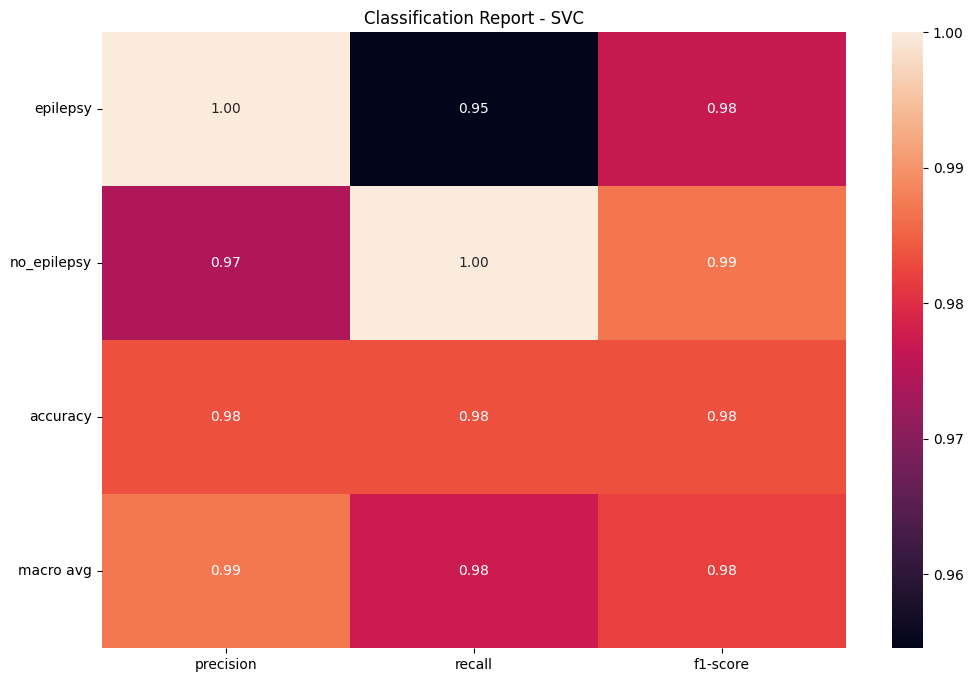

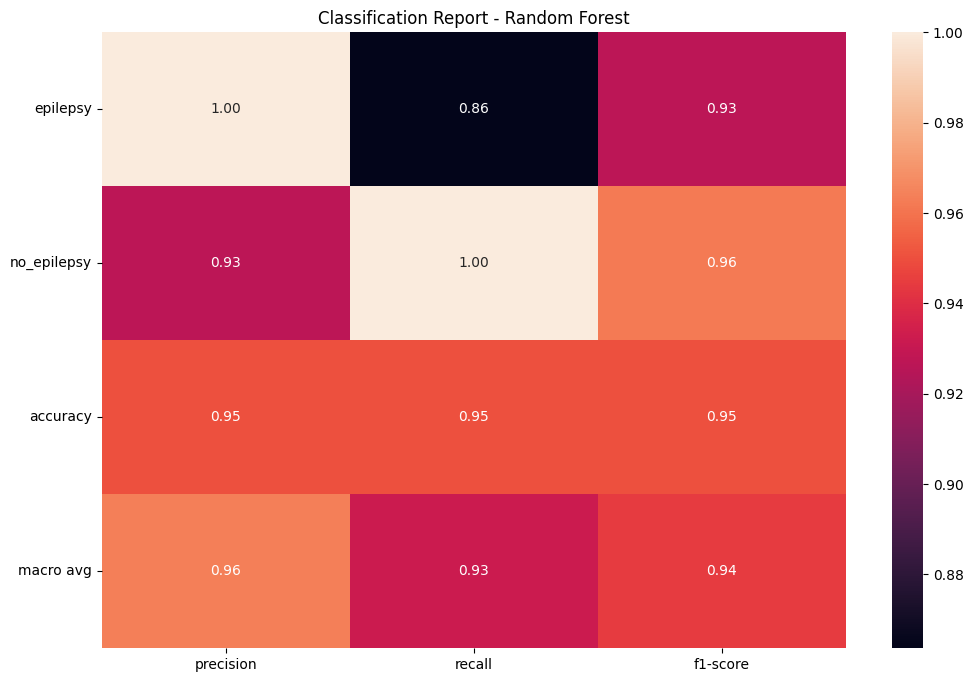

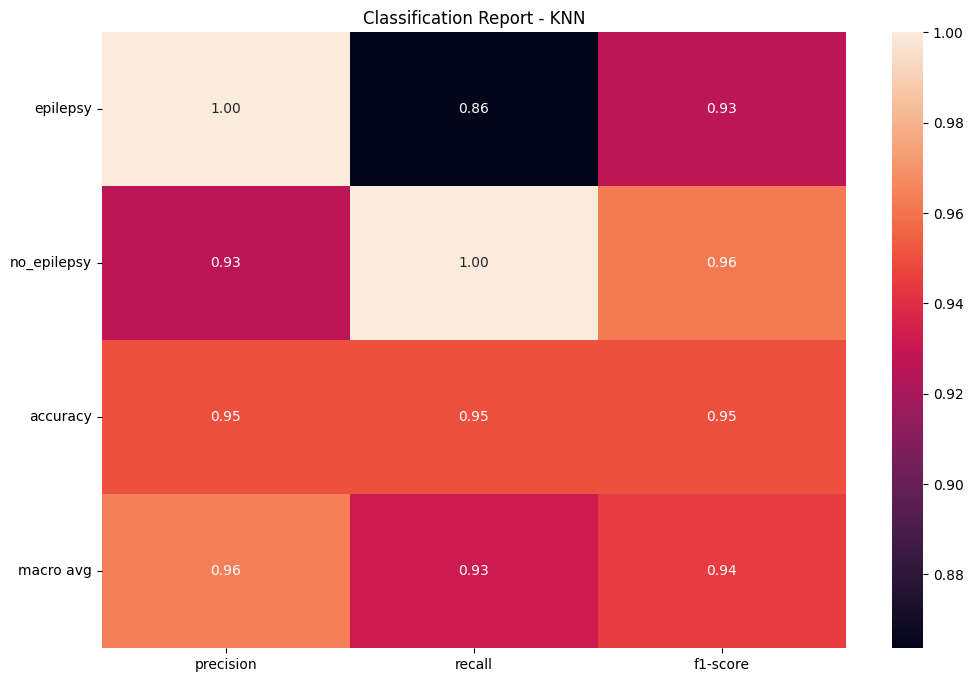

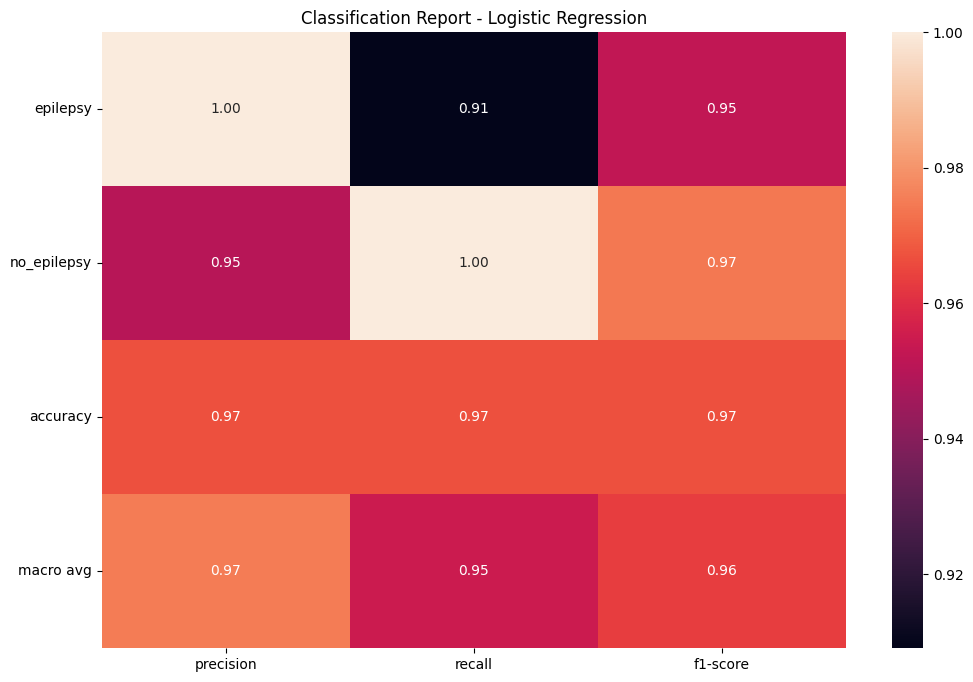

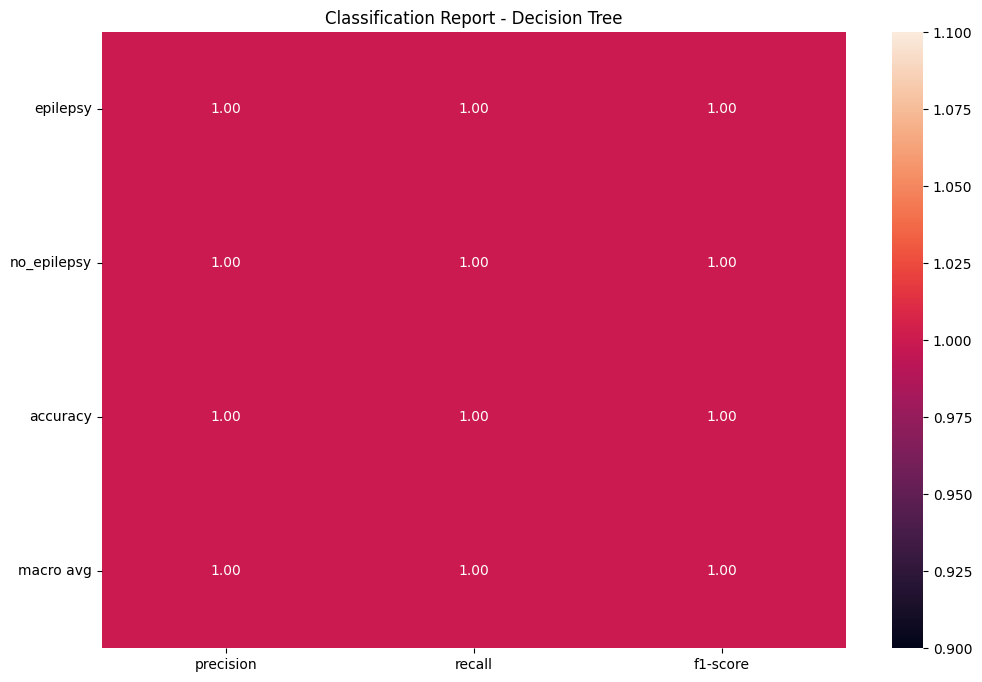

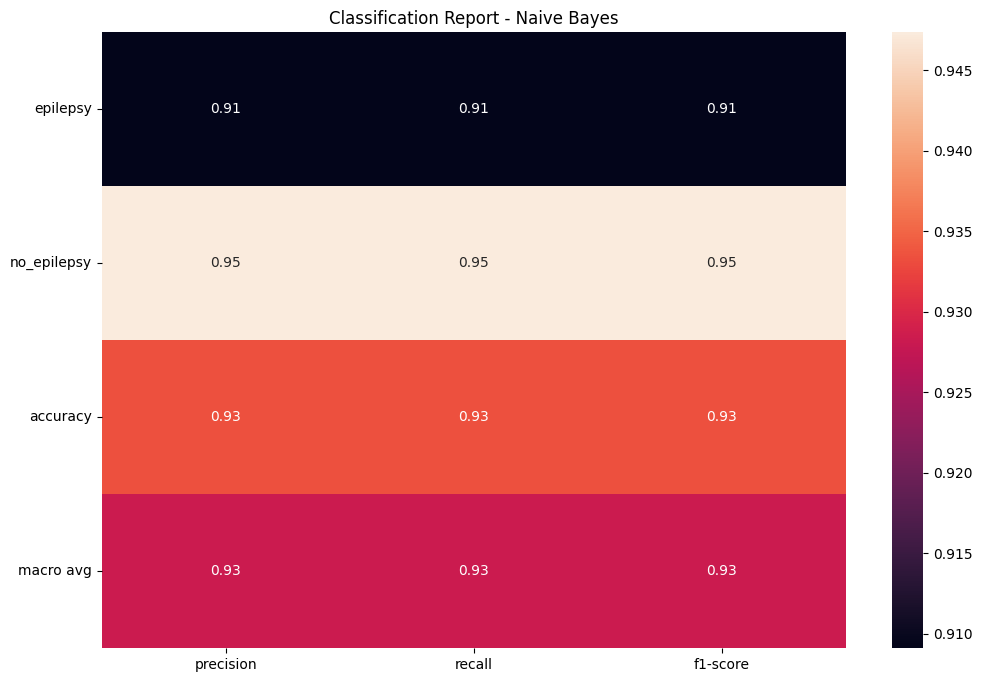

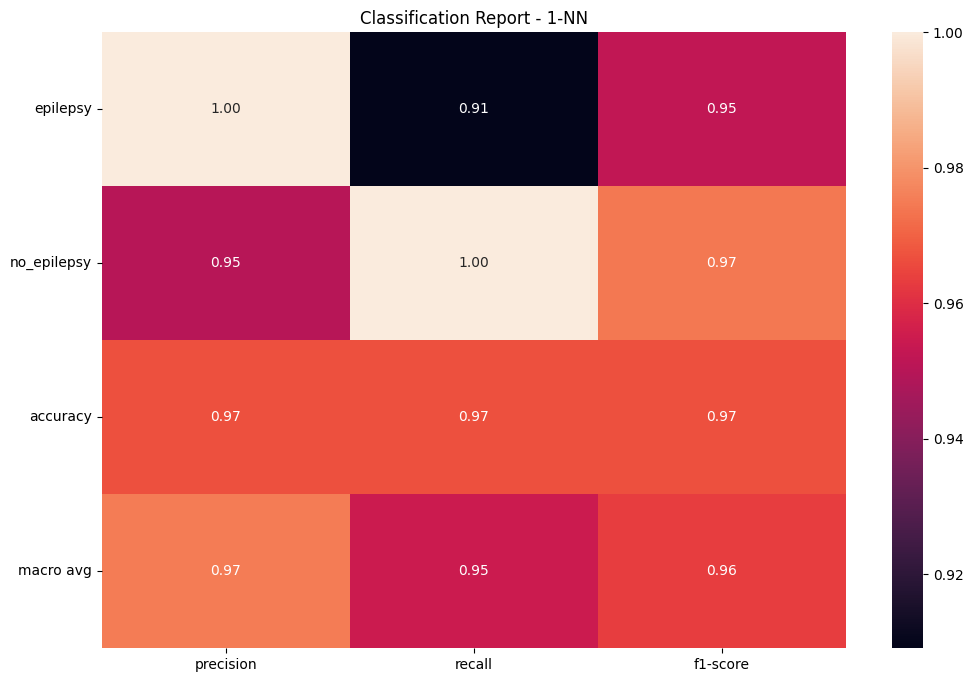

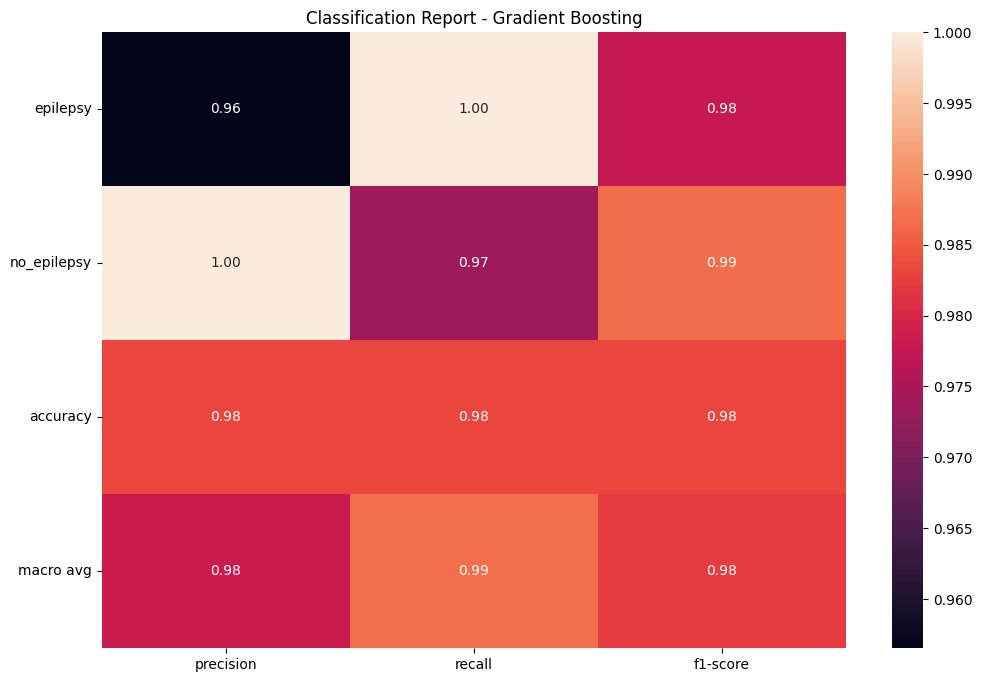

In [8]:
from sklearn.metrics import confusion_matrix, classification_report # Import classification_report

for model_name, y_pred in models.items():
    report = classification_report(y_test, y_pred, target_names=label_encoder.classes_, output_dict=True)
    df_report = pd.DataFrame(report).transpose()

    # Remove 'support' row and transpose
    df_report_heatmap = df_report.iloc[:-1, :-1]  # No .T here

    plt.figure(figsize=(12, 8))
    sns.heatmap(df_report_heatmap, annot=True, cmap='rocket', fmt=".2f")
    plt.yticks(rotation=0)
    plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
    plt.xlabel("")
    plt.ylabel("")
    plt.title(f'Classification Report - {model_name}')
    plt.show()

In [22]:
import os
import joblib

def save_models_to_drive(models, folder_path='/content/drive/MyDrive/Khai/bonn/model/3classes'):
    """
    Saves sklearn models to a specific Google Drive folder.

    Args:
        models (dict): A dictionary where keys are model names
                       and values are the corresponding model objects.
        folder_path (str): The full path to the folder in your Drive to
                           save the models.
    """

    # Mount Google Drive (usually not needed if already mounted)
    drive.mount('/content/drive')

    # Create the folder if it doesn't exist
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)

    for model_name, model in models.items():
        file_path = os.path.join(folder_path, f"{model_name}.joblib")
        joblib.dump(model, file_path)

# Save the models to your specified Google Drive folder
save_models_to_drive(models)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
